# Assignment2 - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [1]:
# stundent details example: John S. 9812
#                       student details 1: Ilay W. 0725
# (if exists)           student details 2: Aharoni C. 1047
# (if exists)           student details 3: Adir B. 1420
# (if exists&premitted) student details 4: 

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name: Chatgpt-4o
Goal:Understanding Gridsearch and how to use it
Propmpt1: "Explain what GridSearchCV does in machine learning and why it's useful."
    
Propmpt2: "Show an example of how to use GridSearchCV with a pipeline that includes preprocessing and a classifier."
    
Propmpt3: "Give step-by-step guidance on tuning hyperparameters using GridSearchCV"


AI agent name 2:Chatgpt-4o
Goal: Understanding how to use random_state to achive the best reproducible result
Propmpt1: "Does it matter what matter i use in random_state and can i use any number i want"
    
Propmpt2: "What numbers are usualy used"
    
Propmpt3:

Other assistanse:    
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>
In this project, the learning problem is a binary classification task — predicting whether a passenger survived the Titanic disaster based on their personal and travel-related attributes. The dataset used comes from the well-known Titanic competition and contains features such as age, sex, passenger class (Pclass), number of siblings/spouses aboard (SibSp), number of parents/children aboard (Parch), fare, and port of embarkation (Embarked). The target variable is "Survived", which is 1 if the passenger survived and 0 otherwise. The goal is to train a machine learning model that can learn from the provided features and generalize well to unseen data in order to accurately predict survival.



    
</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [2]:
from scipy.stats import randint

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (
    f1_score,
    make_scorer,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report
)


In [3]:
train_df = pd.read_csv('titanic_train.csv')
test_df = pd.read_csv('titanic_test.csv')

print('First 5 training rows:')
print(train_df.head())
print('\nFirst 5 test rows:')
print(test_df.head())

x_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']



First 5 training rows:
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Survived
0       1    0  54.0      1      0  78.2667         1         1
1       2    0  45.0      0      0  13.5000         0         1
2       3    1  20.0      0      0   9.5000         0         0
3       3    1  36.0      0      0   7.8958         0         0
4       3    1  22.0      0      0   8.0500         0         0

First 5 test rows:
   Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Survived
0       3    1  35.000000      0      0   7.0500         0         0
1       3    1  30.000000      0      0   7.2500         0         0
2       3    1  29.699118      0      0  14.5000         0         0
3       3    0  21.000000      0      0   7.7500         2         0
4       3    1  32.000000      0      0  56.4958         0         1


Text(0.5, 1.0, 'Feature correlation')

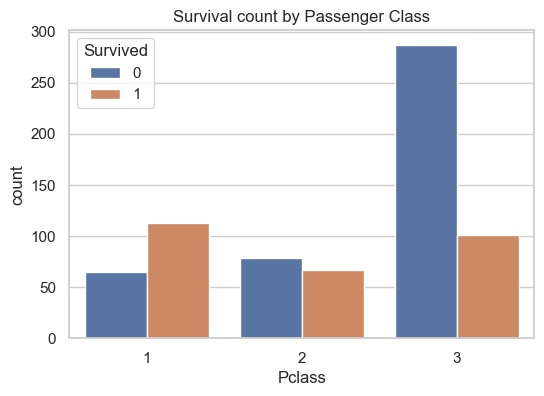

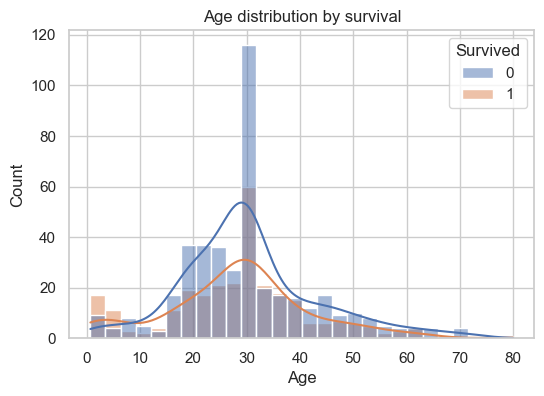

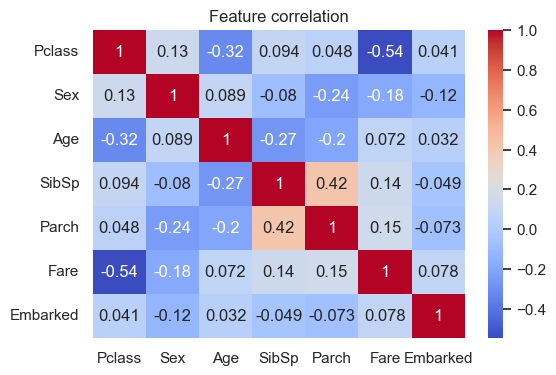

In [4]:
sns.set(style='whitegrid')

# Survival counts by passenger class
plt.figure(figsize=(6, 4))
sns.countplot(data=train_df, x='Pclass', hue='Survived')
plt.title('Survival count by Passenger Class')


# Age distribution for survived vs. not survived passengers
plt.figure(figsize=(6, 4))
sns.histplot(data=train_df, x='Age', hue='Survived', kde=True)
plt.title('Age distribution by survival')


# Correlation heatmap between the numeric features
plt.figure(figsize=(6, 4))
cor = train_df.drop('Survived', axis=1).corr()
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.title('Feature correlation')


## Part 3 - Experiments
You could add as many code cells as needed

In [5]:
# First we need to check if there is any missing data
print(train_df.isnull().sum())
print(test_df.isnull().sum())
# For the scaling im dividing all the data into what needs to be scaled and how
# Categorical data with OneHotEncoding, Numerical data with StandardScaler, and what doesn't need any scaling will pass through the pipeline

numerical_autoscale = ['Age' , 'Fare']
numerical_passthrough = ['SibSp' , 'Parch']
categorical_autoscale = ['Pclass' , 'Sex' , 'Embarked']

# Pclass, Sex, and Embarked are currently stored as integers,
# but their values are actually categories, not real numbers.
# If we leave them as-is, LogisticRegression might treat them as numeric,
# which can lead to wrong assumptions by the model.
# Changing them to strings and using OneHotEncoder makes sure
# they are handled correctly as categorical features.

train_df['Sex'] = train_df['Sex'].map({0 : '0' , 1 : '1'})
train_df['Embarked'] = train_df['Embarked'].map({0: '0' , 1: '1' ,2: '2'})
train_df['Pclass'] = train_df['Pclass'].map({1: '1' , 2: '2' ,3: '3' })


numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')) ,
    ('scaler' , OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('numerical', numerical_transformer, numerical_autoscale),
    ('categorical', categorical_transformer, categorical_autoscale),
    ('pass' , 'passthrough' , numerical_passthrough)
])


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64


In [6]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier' , LogisticRegression())
])

In [7]:
grid_params = [
    {
        'classifier' : [LogisticRegression(max_iter=1000)],
        'classifier__C' : [0.1 , 1.0 , 10.0]

    },
    {
        'classifier' : [KNeighborsClassifier()],
        'classifier__n_neighbors' : [3 , 5 , 7 , 9 , 11]
    },
    {
        'classifier' : [RandomForestClassifier(random_state=50)],   #50 gave the best final result overall
        'classifier__n_estimators' : [50,100],
        'classifier__max_depth' : [5, 7 , 9, 10 , None]
    }
]
scorer = make_scorer(f1_score , average='binary')

#defining Gridsearch
grid = GridSearchCV(
    pipeline,
    param_grid=grid_params,
    scoring=scorer,
    cv=5 ,      #5-fold-cross-validation
    n_jobs=-1,  #Use all proccecors to make it run faster
    refit=True
)
grid.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Fare']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('scaler',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Pclass',
                                                                          'Sex',
                                                                          'Emb...
             param_grid=[{'classifier': [LogisticRegression(max_iter=1000)],
                          'classifier__C': [0.1, 1.0, 10.0]},
                         {'classifier': [KNeighborsClassifier()],
                          'classifier__n_neighbors': [3, 5, 7, 9, 11]},
                         {'classifier': [RandomForestClassifier(random_state=50)],
                          'classifier__max_depth': [5, 7, 9, 10, None],
                          'classifier__n_estimators': [50, 100]}],
             scoring=make_scorer(f1_score, response_method='predict', average=binary))

In [8]:
results = pd.DataFrame(grid.cv_results_)
summary = results[['params', 'mean_test_score', 'std_test_score']].copy()
summary.columns = ['Model Parameters', 'Mean F1 Score (CV)', 'F1 Score Std Dev']
summary = summary.sort_values(by='Mean F1 Score (CV)', ascending=False).reset_index(drop=True)

print("=== Grid Search Results (Evaluated by F1 Score, 5-Fold Cross Validation) ===\n")
print(summary.to_string(index=False))
print("\nBest Model (based on mean F1 score):")
print(grid.best_estimator_)


=== Grid Search Results (Evaluated by F1 Score, 5-Fold Cross Validation) ===

                                                                                                       Model Parameters  Mean F1 Score (CV)  F1 Score Std Dev
    {'classifier': RandomForestClassifier(random_state=50), 'classifier__max_depth': 9, 'classifier__n_estimators': 50}            0.760844          0.032554
  {'classifier': RandomForestClassifier(random_state=50), 'classifier__max_depth': 10, 'classifier__n_estimators': 100}            0.755736          0.024588
   {'classifier': RandomForestClassifier(random_state=50), 'classifier__max_depth': 9, 'classifier__n_estimators': 100}            0.754156          0.031420
   {'classifier': RandomForestClassifier(random_state=50), 'classifier__max_depth': 10, 'classifier__n_estimators': 50}            0.752618          0.034756
   {'classifier': RandomForestClassifier(random_state=50), 'classifier__max_depth': 7, 'classifier__n_estimators': 100}            0

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [9]:
best_model = grid.best_estimator_
X_test = test_df.drop('Survived', axis=1)
y_test = test_df['Survived']
y_pred = best_model.predict(X_test)

test_confusion_matrix = confusion_matrix(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)
print('\nTest Confusion matrix:', test_confusion_matrix)
print('\nTest Precision score:', test_precision)
print('\nTest Recall score:', test_recall)
print('\nTest F1 score:', test_f1)

print('\nFirst 5 predictions:')
print(pd.DataFrame({'Actual': y_test[:5].values,
                    'Predicted': y_pred[:5]}))


Test Confusion matrix: [[111   7]
 [ 13  48]]

Test Precision score: 0.8727272727272727

Test Recall score: 0.7868852459016393

Test F1 score: 0.8275862068965517

First 5 predictions:
   Actual  Predicted
0       0          0
1       0          0
2       0          0
3       0          1
4       1          1


## Part 5 - Apply on test and show model performance estimation